In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px

    Color
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
..    ...
85    3.0
86    3.0
87    3.0
88    3.0
89    3.0

[90 rows x 1 columns]


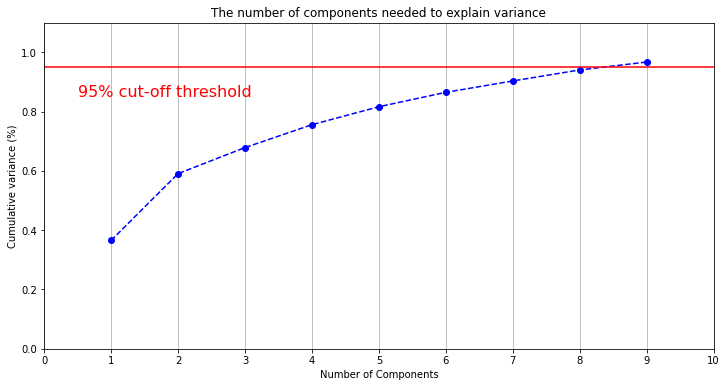

In [22]:
dat = pd.read_csv('top_3_each_team_clean.csv')
dat = dat.loc[:,dat.columns != 'Unnamed: 1']
dat = dat.loc[:,dat.columns != 'Team']
col = list(dat.columns)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dat)
X_scaled = scaler.transform(dat)
col = list(dat.columns)
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(X_scaled)
reduced = pca.transform(X_scaled)
colors = pd.read_csv('kmeans.csv')
print(colors)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
fig = px.scatter_matrix(
    reduced,
    labels = labels,
    color = colors
)
fig.show()

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()
